In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,precision_recall_curve

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2, f_regression,mutual_info_regression
import statsmodels.api as sm

In [4]:
df=pd.read_csv('C:\\Users\\Dell\\Desktop\\pgpdse\\Imputed _with_day_of_week (1).csv')

In [5]:
df.head()

,Article Date,Type of News,Day of Week,Lda 00,Lda 01,Lda 02,Lda 03,Lda 04,Abs Title Sentiment Polarity,Abs Title Subjectivity,...,Self Reference Max Shares,Self Reference Min Shares,Shares,Timedelta,Title Sentiment Polarity,Title Subjectivity,Article Year,Month,Day,Popular
0,01-07-2013,Entertainment News,Monday,0.500331,0.378279,0.040005,0.041263,0.040123,0.187500,0.000000,...,496.0,496.0,593,731,-0.187500,0.500000,2013,1,7,0
1,01-07-2013,Business News,Monday,0.799756,0.050047,0.050096,0.050101,0.050001,0.000000,0.500000,...,0.0,0.0,711,731,0.000000,0.000000,2013,1,7,0
2,01-07-2013,Business News,Monday,0.217792,0.033334,0.033351,0.033334,0.682188,0.000000,0.500000,...,918.0,918.0,1500,731,0.000000,0.000000,2013,1,7,1
3,01-07-2013,Entertainment News,Monday,0.028573,0.419300,0.494651,0.028905,0.028572,0.000000,0.500000,...,0.0,0.0,1200,731,0.000000,0.000000,2013,1,7,0
4,01-07-2013,Tech News,Monday,0.028633,0.028794,0.028575,0.028572,0.885427,0.136364,0.045455,...,16000.0,545.0,505,731,0.136364,0.454545,2013,1,7,0


In [6]:
df.columns

Index([' Article Date ', 'Type of News', 'Day of Week', 'Lda 00', 'Lda 01',
       'Lda 02', 'Lda 03', 'Lda 04', 'Abs Title Sentiment Polarity',
       'Abs Title Subjectivity', 'Average Token Length',
       'Avg Negative Polarity', 'Avg Positive Polarity',
       'Global Rate Negative Words', 'Global Rate Positive Words',
       'Global Sentiment Polarity', 'Global Subjectivity', 'Kw Avg Avg',
       'Kw Avg Max', 'Kw Avg Min', 'Kw Max Avg', 'Kw Max Max', 'Kw Max Min',
       'Kw Min Avg', 'Kw Min Max', 'Kw Min Min', 'Max Negative Polarity',
       'Max Positive Polarity', 'Min Negative Polarity',
       'Min Positive Polarity', 'N Non Stop Unique Tokens', 'N Non Stop Words',
       'N Tokens Content', 'N Tokens Title', 'N Unique Tokens', 'Num Hrefs',
       'Num Imgs', 'Num Keywords', 'Num Self Hrefs', 'Num Videos',
       'Rate Negative Words', 'Rate Positive Words',
       'Self Reference Avg Sharess', 'Self Reference Max Shares',
       'Self Reference Min Shares', 'Shares', 'Tim

In [7]:
df1=df[[ 'Type of News', 'Day of Week', 'Lda 00', 'Lda 01',
       'Lda 02', 'Lda 03', 'Lda 04', 'Abs Title Sentiment Polarity',
       'Abs Title Subjectivity', 'Average Token Length',
       'Avg Negative Polarity', 'Avg Positive Polarity',
       'Global Rate Negative Words', 'Global Rate Positive Words',
       'Global Sentiment Polarity', 'Global Subjectivity', 'Kw Avg Avg',
       'Kw Avg Max', 'Kw Avg Min', 'Kw Max Avg', 'Kw Max Max', 'Kw Max Min',
       'Kw Min Avg', 'Kw Min Max', 'Kw Min Min', 'Max Negative Polarity',
       'Max Positive Polarity', 'Min Negative Polarity',
       'Min Positive Polarity', 'N Non Stop Unique Tokens', 'N Non Stop Words',
       'N Tokens Content', 'N Tokens Title', 'N Unique Tokens', 'Num Hrefs',
       'Num Imgs', 'Num Keywords', 'Num Self Hrefs', 'Num Videos',
       'Rate Negative Words', 'Rate Positive Words',
       'Self Reference Avg Sharess', 'Self Reference Max Shares',
       'Self Reference Min Shares', 
       'Title Sentiment Polarity', 'Title Subjectivity', 'Article Year',
       'Month', 'Popular']]

In [8]:
df1.head()

,Type of News,Day of Week,Lda 00,Lda 01,Lda 02,Lda 03,Lda 04,Abs Title Sentiment Polarity,Abs Title Subjectivity,Average Token Length,...,Rate Negative Words,Rate Positive Words,Self Reference Avg Sharess,Self Reference Max Shares,Self Reference Min Shares,Title Sentiment Polarity,Title Subjectivity,Article Year,Month,Popular
0,Entertainment News,Monday,0.500331,0.378279,0.040005,0.041263,0.040123,0.187500,0.000000,4.680365,...,0.230769,0.769231,496.000000,496.0,496.0,-0.187500,0.500000,2013,1,0
1,Business News,Monday,0.799756,0.050047,0.050096,0.050101,0.050001,0.000000,0.500000,4.913725,...,0.266667,0.733333,0.000000,0.0,0.0,0.000000,0.000000,2013,1,0
2,Business News,Monday,0.217792,0.033334,0.033351,0.033334,0.682188,0.000000,0.500000,4.393365,...,0.142857,0.857143,918.000000,918.0,918.0,0.000000,0.000000,2013,1,1
3,Entertainment News,Monday,0.028573,0.419300,0.494651,0.028905,0.028572,0.000000,0.500000,4.404896,...,0.333333,0.666667,0.000000,0.0,0.0,0.000000,0.000000,2013,1,0
4,Tech News,Monday,0.028633,0.028794,0.028575,0.028572,0.885427,0.136364,0.045455,4.682836,...,0.139785,0.860215,3151.157895,16000.0,545.0,0.136364,0.454545,2013,1,0


In [9]:
df1.shape

(39644, 49)

## Encoding the Categorical Columns

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Type of News']=le.fit_transform(df1['Type of News'])
df1['Day of Week']=le.fit_transform(df1['Day of Week'])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# splitting  Independent variables to x and dependent to y

In [105]:
x=df1.drop('Popular',axis=1)
y=df1['Popular']

In [106]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 48 columns):
Type of News                    39644 non-null int32
Day of Week                     39644 non-null int32
Lda 00                          39644 non-null float64
Lda 01                          39644 non-null float64
Lda 02                          39644 non-null float64
Lda 03                          39644 non-null float64
Lda 04                          39644 non-null float64
Abs Title Sentiment Polarity    39644 non-null float64
Abs Title Subjectivity          39644 non-null float64
Average Token Length            39644 non-null float64
Avg Negative Polarity           39644 non-null float64
Avg Positive Polarity           39644 non-null float64
Global Rate Negative Words      39644 non-null float64
Global Rate Positive Words      39644 non-null float64
Global Sentiment Polarity       39644 non-null float64
Global Subjectivity             39644 non-null float64
Kw Avg Avg     

# Feature selection-Backward Elimination

In [107]:
## Backward elimination
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(x)
#Fitting sm.glm model
model = sm.GLM(y,X_1,family=sm.families.Binomial()).fit()
model.pvalues

# p val > 0.5 irrelavent features for model's accuracy
#code:for eliminating features with p val> 0.5
    #Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Type of News', 'Day of Week', 'Lda 00', 'Lda 01', 'Lda 02', 'Lda 03', 'Lda 04', 'Abs Title Subjectivity', 'Average Token Length', 'Global Subjectivity', 'Kw Avg Avg', 'Kw Avg Max', 'Kw Avg Min', 'Kw Max Avg', 'Kw Max Min', 'Kw Min Avg', 'Kw Min Min', 'Min Positive Polarity', 'N Non Stop Unique Tokens', 'N Tokens Content', 'Num Hrefs', 'Num Keywords', 'Num Self Hrefs', 'Rate Positive Words', 'Self Reference Avg Sharess', 'Title Sentiment Polarity', 'Title Subjectivity', 'Month']


In [108]:
len(selected_features_BE)

28

# Used GLM and  used vif to remove multicollinearity and got 22 features

In [109]:
x1=df1[['Type of News', 'Day of Week', 'Lda 00', 'Lda 01', 'Lda 02', 'Lda 04', 'Abs Title Subjectivity', 'Average Token Length', 'Global Subjectivity','Kw Avg Max','Kw Max Avg', 'Kw Min Avg', 'Kw Min Min', 'Min Positive Polarity', 'N Tokens Content', 'Num Hrefs', 'Num Keywords', 'Num Self Hrefs', 'Self Reference Avg Sharess', 'Title Sentiment Polarity', 'Title Subjectivity', 'Month']]

In [110]:
x1.shape

(39644, 22)

In [111]:
x1

,Type of News,Day of Week,Lda 00,Lda 01,Lda 02,Lda 04,Abs Title Subjectivity,Average Token Length,Global Subjectivity,Kw Avg Max,...,Kw Min Min,Min Positive Polarity,N Tokens Content,Num Hrefs,Num Keywords,Num Self Hrefs,Self Reference Avg Sharess,Title Sentiment Polarity,Title Subjectivity,Month
0,1,1,0.500331,0.378279,0.040005,0.040123,0.000000,4.680365,0.521617,0.0,...,0,0.100000,219,4,5,2,496.000000,-0.187500,0.500000,1
1,0,1,0.799756,0.050047,0.050096,0.050001,0.500000,4.913725,0.341246,0.0,...,0,0.033333,255,3,4,1,0.000000,0.000000,0.000000,1
2,0,1,0.217792,0.033334,0.033351,0.682188,0.500000,4.393365,0.702222,0.0,...,0,0.100000,211,3,6,1,918.000000,0.000000,0.000000,1
3,1,1,0.028573,0.419300,0.494651,0.028572,0.500000,4.404896,0.429850,0.0,...,0,0.136364,531,9,7,0,0.000000,0.000000,0.000000,1
4,4,1,0.028633,0.028794,0.028575,0.885427,0.045455,4.682836,0.513502,0.0,...,0,0.033333,1072,19,7,19,3151.157895,0.136364,0.454545,1
5,4,1,0.022245,0.306718,0.022231,0.626582,0.142857,4.359459,0.437409,0.0,...,0,0.136364,370,2,9,2,8500.000000,0.214286,0.642857,1
6,2,1,0.020082,0.114705,0.020024,0.825173,0.500000,4.654167,0.514480,0.0,...,0,0.100000,960,21,10,20,3151.157895,0.000000,0.000000,1
7,4,1,0.022224,0.150733,0.243435,0.561384,0.500000,4.617796,0.543474,0.0,...,0,0.100000,989,20,9,20,3151.157895,0.500000,1.000000,1
8,4,1,0.458250,0.028979,0.028662,0.454412,0.375000,4.855670,0.538889,0.0,...,0,0.400000,97,2,7,0,0.000000,0.000000,0.125000,1
9,5,1,0.040000,0.040000,0.839997,0.040002,0.500000,5.090909,0.313889,0.0,...,0,0.100000,231,4,5,1,0.000000,0.000000,0.000000,1


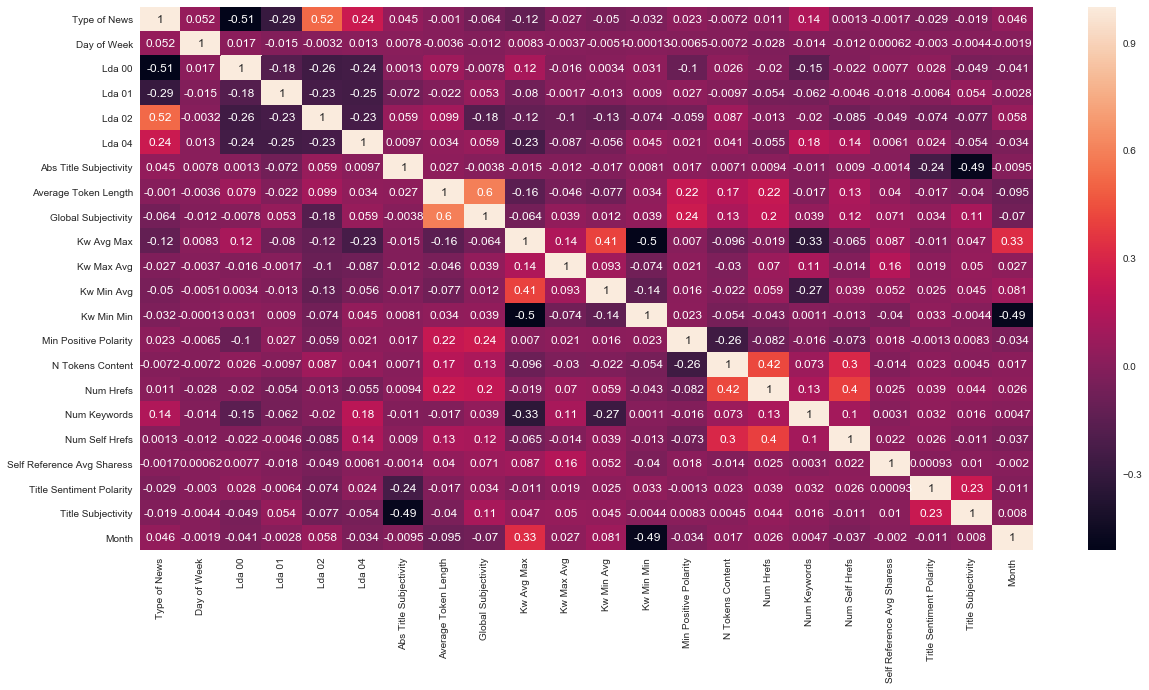

In [112]:
plt.figure(figsize=(20,10))
sns.heatmap(x1.corr(),annot=True)

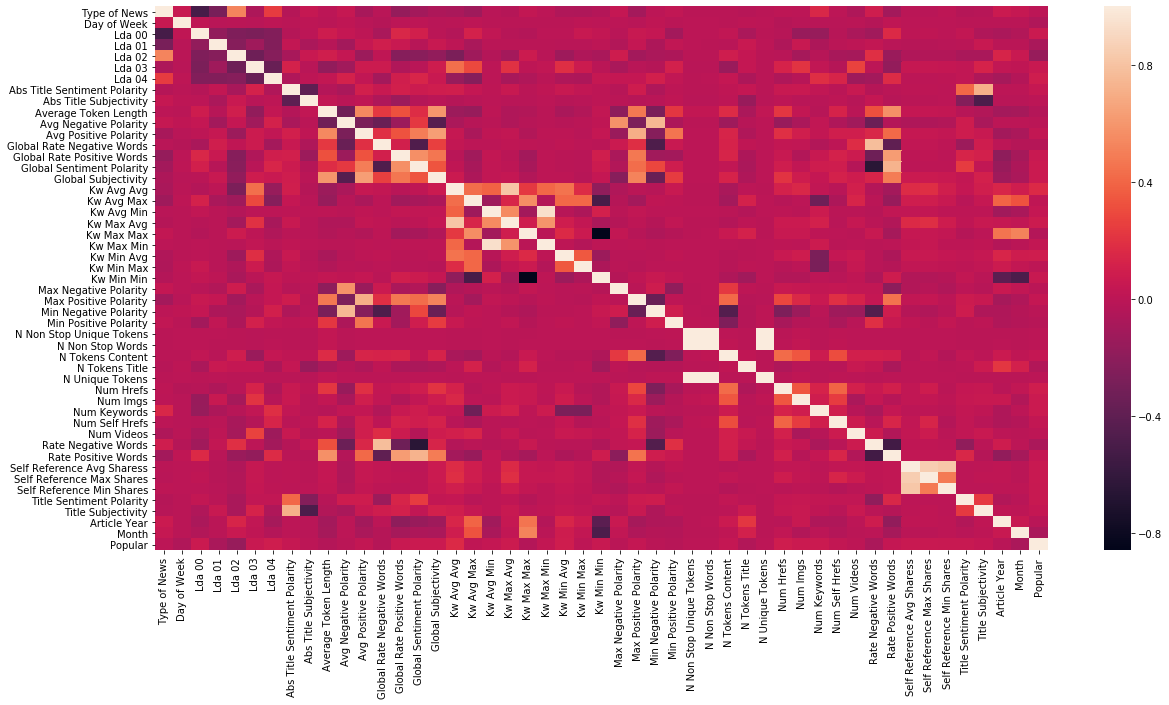

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr())

# Selecting features based on statistical testing

In [113]:
x1_constant=sm.add_constant(x1)

In [114]:
model=sm.GLM(y,x1_constant,family=sm.families.Binomial())

In [115]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Popular   No. Observations:                39644
Model:                            GLM   Df Residuals:                    39621
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25783.
Date:                Thu, 27 Feb 2020   Deviance:                       51565.
Time:                        11:27:22   Pearson chi2:                 4.09e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7761      0.110     -7.029      0.000      -0.993      -0.560
Type of News                   0.1385      0.008     17.021      0.000       0.123       0.154
Day of Week                   -0.0585      0.005    -11.833      0.000      -0.068      -0.049
Lda 00                         0.8467      0.056     15.166      0.000       0.737       0.956
Lda 01                        -0.3680      0.062     -5.909      0.000      -0.490      -0.246
Lda 02                        -1.1354      0.059    -19.226      0.000      -1.251      -1.020
Lda 04                         0.3233      0.051      6.390      0.000       0.224       0.422
Abs Title Subjectivity         0.2790      0.065      4.292      0.000       0.152       0.406
Average Token Length          -0.1900      0.017    -10.980      0.000      -0.224      -0.156
Global Subjectivity            1.1958      0.124      9.682      0.000       0.954       1.438
Kw Avg Max                  3.274e-07   1.15e-07      2.849      0.004    1.02e-07    5.53e-07
Kw Max Avg                   1.75e-05   2.51e-06      6.967      0.000    1.26e-05    2.24e-05
Kw Min Avg                     0.0002   1.05e-05     15.213      0.000       0.000       0.000
Kw Min Min                     0.0012      0.000      5.851      0.000       0.001       0.002
Min Positive Polarity         -0.5362      0.163     -3.291      0.001      -0.855      -0.217
N Tokens Content               0.0002   2.73e-05      5.523      0.000    9.72e-05       0.000
Num Hrefs                      0.0144      0.001     11.772      0.000       0.012       0.017
Num Keywords                   0.0733      0.006     11.389      0.000       0.061       0.086
Num Self Hrefs                -0.0198      0.003     -6.342      0.000      -0.026      -0.014
Self Reference Avg Sharess  5.749e-06   7.31e-07      7.867      0.000    4.32e-06    7.18e-06
Title Sentiment Polarity       0.2615      0.042      6.290      0.000       0.180       0.343
Title Subjectivity             0.1371      0.038      3.563      0.000       0.062       0.212
Month                         -0.0416      0.004    -11.545      0.000      -0.049      -0.035
==============================================================================================
"""

In [116]:
#as you can see all the features are passing the test which is p<0.005

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x1_constant.values, i) for i in range(x1_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x1.columns)

,vif
Type of News,2.181875
Day of Week,1.008545
Lda 00,1.956258
Lda 01,1.702291
Lda 02,2.467625
Lda 04,1.936043
Abs Title Subjectivity,1.359250
Average Token Length,1.944788
Global Subjectivity,1.867980
Kw Avg Max,2.205797


In [118]:
#considering the above features and building the model.

# Train-test-split

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(x1,y, test_size = 0.3, random_state = 0)

# Scaling

In [121]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train_ms=ms.fit_transform(X_train)
X_test_ms = ms.transform(X_test)

# Logistic Regression

In [122]:
#A
# Create logistic regression object
logreg = LogisticRegression(max_iter=500,C=0.1,random_state=0)
# Train the model using the training sets and check score
logreg.fit(X_train_ms, Y_train)
#Predict Output
log_predicted= logreg.predict(X_test_ms)

logreg_score = round(logreg.score(X_train_ms, Y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test_ms, Y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(Y_test,log_predicted))

Logistic Regression Training Score: 
 62.0
Logistic Regression Test Score: 
 61.62
Coefficient: 
 [[ 0.6818814  -0.34687991  0.69401285 -0.39228555 -1.11726049  0.22531036
   0.16116076 -1.03532721  1.01006165  0.36849923  0.97386049  0.62174335
   0.41512653 -0.65798066  0.90663957  1.70380528  0.74643089 -0.51730135
   1.29205264  0.4638752   0.18427433 -0.41491693]]
Intercept: 
 [-1.12174615]
Accuracy: 
 0.6161930385068102


# Decision Tree

DecisionTree Score: 
 69.0
DecisionTree Test Score: 
 62.64
Accuracy: 
 0.6263662350765091
[[3961 1963]
 [2481 3489]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      5924
           1       0.64      0.58      0.61      5970

    accuracy                           0.63     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.63      0.63     11894



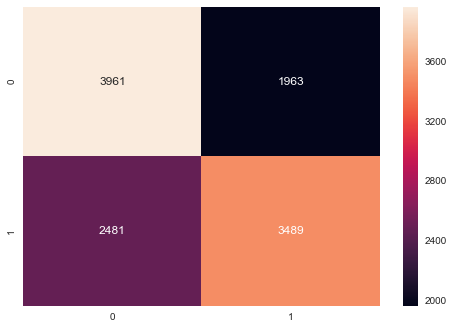

In [123]:
Dec_tree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=10, min_samples_leaf=20)
Dec_tree.fit(X_train_ms, Y_train)
#Predict Output
Dec_tree_predicted = Dec_tree.predict(X_test_ms)

Dec_tree_score = round(Dec_tree.score(X_train_ms, Y_train) * 100, 2)
Dec_tree_score_test = round(Dec_tree.score(X_test_ms, Y_test) * 100, 2)
print('DecisionTree Score: \n', Dec_tree_score)
print('DecisionTree Test Score: \n', Dec_tree_score_test)
print('Accuracy: \n', accuracy_score(Y_test, Dec_tree_predicted))
print(confusion_matrix(Y_test,Dec_tree_predicted))
print(classification_report(Y_test,Dec_tree_predicted))

sns.heatmap(confusion_matrix(Y_test,Dec_tree_predicted),annot=True,fmt="d")

# Random Forest

In [124]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_leaf=50,random_state=0)
random_forest.fit(X_train_ms, Y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test_ms)

random_forest_score = round(random_forest.score(X_train_ms, Y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test_ms, Y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(Y_test,rf_predicted))
print(confusion_matrix(Y_test,rf_predicted))
print(classification_report(Y_test,rf_predicted))


Random Forest Score: 
 68.0
Random Forest Test Score: 
 65.28
Accuracy: 
 0.6527661005549016
[[3845 2079]
 [2051 3919]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      5924
           1       0.65      0.66      0.65      5970

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



# Gradient Boosting

In [125]:
gb = GradientBoostingClassifier(n_estimators=100,warm_start=True)
gb.fit(X_train_ms, Y_train)
#Predict Output
gb_predicted = gb.predict(X_test_ms)

gradientboost_score = round(gb.score(X_train_ms, Y_train) * 100, 2)
gradientboost_test_score = round(gb.score(X_test_ms, Y_test) * 100, 2)
print('gradientboost Score: \n', gradientboost_score)
print('gradientboost Test Score: \n', gradientboost_test_score)
print('Accuracy: \n', accuracy_score(Y_test,gb_predicted))
print(confusion_matrix(Y_test,gb_predicted))
print(classification_report(Y_test,gb_predicted))

gradientboost Score: 
 67.86
gradientboost Test Score: 
 66.36
Accuracy: 
 0.6636119051622666
[[4017 1907]
 [2094 3876]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      5924
           1       0.67      0.65      0.66      5970

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



# Feature Importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

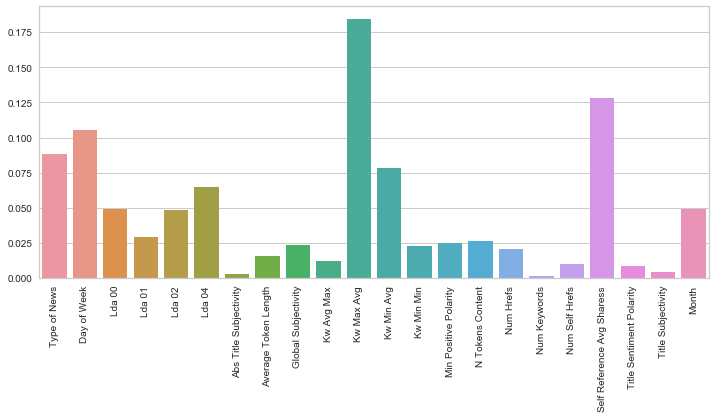

In [126]:
plt.figure(figsize=(12,5))
sns.barplot(x1.columns,gb.feature_importances_)
plt.xticks(rotation=90)

# Roc-Auc curve

In [34]:
probs = gb.predict_proba(X_test_ms)

In [35]:
probs = probs[:, 1]

In [36]:
auc = roc_auc_score(Y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.72


In [37]:
roc_curve(Y_test, probs)

(array([0.        , 0.        , 0.        , ..., 0.99780554, 0.99780554,
        1.        ]),
 array([0.00000000e+00, 1.67504188e-04, 6.19765494e-03, ...,
        9.99832496e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.93788   , 0.93788   , 0.89488803, ..., 0.11155557, 0.11045248,
        0.08514871]))

In [38]:
fpr, tpr, thresholds = roc_curve(Y_test, probs)

In [39]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
   
    
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

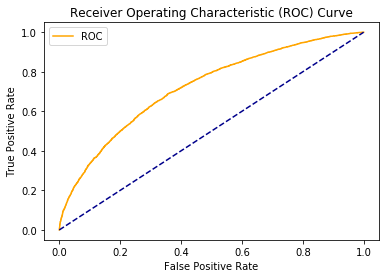

In [40]:
plot_roc_curve(fpr, tpr)

# Learning Rates

([0.6738738738738739,
  0.6846846846846847,
  0.6826426426426426,
  0.6802702702702703,
  0.6799279279279279,
  0.6787987987987988,
  0.679021879021879,
  0.6781981981981982,
  0.6793993993993994,
  0.6785945945945946],
 [0.6636119051622666,
  0.6636119051622666,
  0.6636119051622666,
  0.6636119051622666,
  0.6636119051622666,
  0.6636119051622666,
  0.6636119051622666,
  0.6636119051622666,
  0.6636119051622666,
  0.6636119051622666])

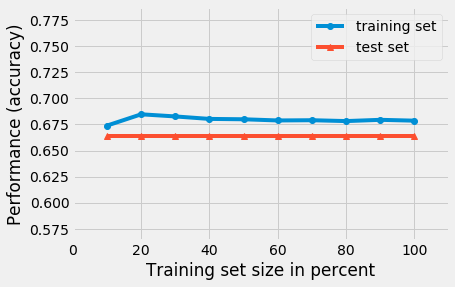

In [41]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train_ms,Y_train,X_test_ms,Y_test,gb,scoring='accuracy',print_model=False)

# Voting Classifier using soft

In [46]:
from vecstack import stacking 
models = []
vc =VotingClassifier(estimators=[('DT',Dec_tree),('RF',random_forest),('GB',gb),('XGB',xgb)],voting='soft')
vc.fit(X_train_ms, Y_train)
vc_predicted = vc.predict(X_test_ms)

vc_score = round(vc.score(X_train_ms, Y_train) * 100, 2)
vc_test_score = round(gb.score(X_test_ms, Y_test) * 100, 2)
print('vc train Score: \n', vc_score)
print('vc Test Score: \n', vc_test_score)
print('Accuracy: \n', accuracy_score(Y_test,vc_predicted))
print(confusion_matrix(Y_test,vc_predicted))
print(classification_report(Y_test,vc_predicted))

vc train Score: 
 71.14
vc Test Score: 
 66.36
Accuracy: 
 0.6598284849503951
[[4026 1898]
 [2148 3822]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.67      5924
           1       0.67      0.64      0.65      5970

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



# XGBoost classifier

In [43]:
from xgboost import XGBClassifier


In [45]:
xgb = XGBClassifier(n_estimators=100,warm_start=True,max_depth=5,learning_rate=0.11)
xgb.fit(X_train_ms, Y_train)
#Predict Output
xgb_predicted = xgb.predict(X_test_ms)

xgradientboost_score = round(xgb.score(X_train_ms, Y_train) * 100, 2)
xgradientboost_test_score = round(xgb.score(X_test_ms, Y_test) * 100, 2)
print('xgradientboost Score: \n', xgradientboost_score)
print('xgradientboost Test Score: \n', xgradientboost_test_score)
print('Accuracy: \n', accuracy_score(Y_test,xgb_predicted))
print(confusion_matrix(Y_test,xgb_predicted))
print(classification_report(Y_test,xgb_predicted))

xgradientboost Score: 
 72.36
xgradientboost Test Score: 
 66.48
Accuracy: 
 0.6647889692281823
[[4049 1875]
 [2112 3858]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      5924
           1       0.67      0.65      0.66      5970

    accuracy                           0.66     11894
   macro avg       0.67      0.66      0.66     11894
weighted avg       0.67      0.66      0.66     11894



# Performing cross validation

In [47]:
from sklearn.model_selection import cross_val_score 
for models in [Dec_tree,random_forest,gb,vc,xgb]: 
    accuracies = cross_val_score(estimator = models, X = X_train_ms, y = Y_train, cv = 10)
    print(models,accuracies.mean()) 
    print(accuracies.std())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best') 0.6163603603603603
0.008588680988183953
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_sta

# Stacking

In [59]:
ml=[logreg,Dec_tree,gb,vc,xgb]

In [60]:
S_train, S_test = stacking(ml,                   
                           X_train_ms, Y_train, X_test_ms,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LogisticRegression]
    fold  0:  [0.61657658]
    fold  1:  [0.62396396]
    fold  2:  [0.62036036]
    fold  3:  [0.62234234]
    fold  4:  [0.61009009]
    ----
    MEAN:     [0.61866667] + [0.00494705]
    FULL:     [0.61866667]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.61063063]
    fold  1:  [0.62180180]
    fold  2:  [0.61657658]
    fold  3:  [0.61189189]
    fold  4:  [0.60450450]
    ----
    MEAN:     [0.61308108] + [0.00581801]
    FULL:     [0.61308108]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.65909910]
    fold  1:  [0.66450450]
    fold  2:  [0.66342342]
    fold  3:  [0.65801802]
    fold  4:  [0.65981982]
    ----
    MEAN:     [0.66097297] + [0.00253177]
    FULL:     [0.66097297]

model  3:     [VotingClassifier]
    fold  0:  [0.64900901]
    fold  1:  [0.66234234]
    fold  2:  [0.65729730]

In [61]:
model1= RandomForestClassifier(n_estimators=100,random_state=0,max_depth=10,min_samples_split=100)
    
model1.fit(S_train, Y_train)
y_pred = model1.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(Y_test, y_pred))

Final prediction score: [0.66100555]


In [62]:
model1.score(S_train,Y_train)

0.6650810810810811

In [63]:
model1.feature_importances_

array([0.06178895, 0.02096517, 0.32251545, 0.1838283 , 0.41090213])

In [64]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[4061 1863]
 [2169 3801]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      5924
           1       0.67      0.64      0.65      5970

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



# ROC-AUC

In [65]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

In [66]:
import numpy as np
gmean = np.sqrt(tpr*(1-fpr))

In [67]:
ix = np.argmax(gmean)
print('Best Threshold=%f, G-mean=%f'%(thresholds[ix],gmean[ix]))

Best Threshold=1.000000, G-mean=0.660649


In [68]:
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.66


In [69]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', marker='.',label='ROC CURVE(AREA=%0.2f)'%(auc))
    plt.plot(fpr[ix], tpr[ix], color='Black', marker='o',label='Best')
   
    
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

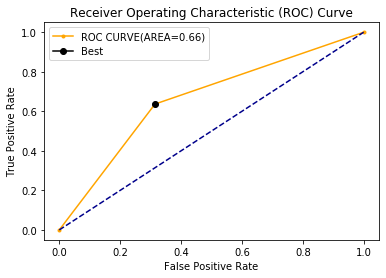

In [70]:
plot_roc_curve(fpr, tpr)

# Black point is the best point where we are getting high accuracy.FPR is low and TPR is high at this point

# PR Curve

In [71]:
precision,recall,threshold = precision_recall_curve(Y_test,y_pred)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


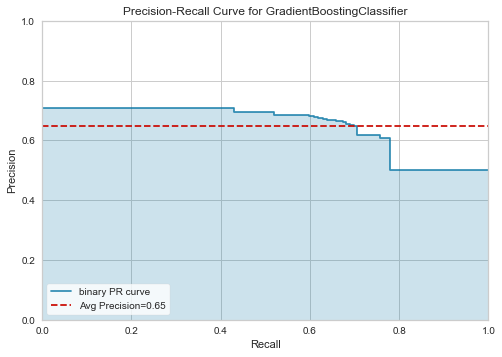

In [72]:
from yellowbrick.classifier import PrecisionRecallCurve,ROCAUC
pr = PrecisionRecallCurve(GradientBoostingClassifier(random_state=0,  learning_rate=0.1,n_estimators=100, max_depth=7))
pr.fit(S_train,Y_train)
pr.score(S_test,Y_test)
pr.show()                          

# ROC-CURVE

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


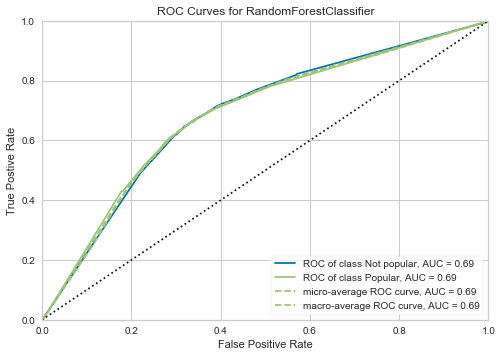

In [73]:
roc = ROCAUC(RandomForestClassifier(random_state=0,n_estimators=100, max_depth=8),classes=['Not popular','Popular'])
roc.fit(S_train,Y_train)
roc.score(S_test,Y_test)
roc.show()   

# Learning Rates

([0.6637837837837838,
  0.6754954954954955,
  0.6714714714714715,
  0.6682882882882882,
  0.6662342342342342,
  0.6651051051051051,
  0.6655341055341055,
  0.6652702702702703,
  0.6662262262262262,
  0.6650810810810811],
 [0.6613418530351438,
  0.6638641331763915,
  0.6621826130822264,
  0.6624348410963511,
  0.6623507650916428,
  0.6617622330586851,
  0.6616781570539768,
  0.6619303850681015,
  0.661425929039852,
  0.6610055490163107])

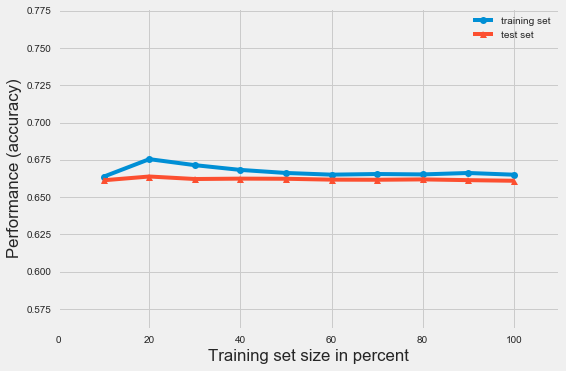

In [74]:
plot_learning_curves(S_train,Y_train,S_test,Y_test,model1,scoring='accuracy',print_model=False)

# choosing the optimal cut-off for classification

In [75]:
rf_pred=gb.predict_proba(X_test_ms)
predictions=pd.DataFrame(rf_pred[:,1:],columns=['Random_forest_pred'])


In [76]:
predictions['popular']=predictions['Random_forest_pred'].map(lambda x:1 if x>=0.49 else 0)

In [77]:
predictions

,Random_forest_pred,popular
0,0.609921,1
1,0.273692,0
2,0.299494,0
3,0.526139,1
4,0.387447,0
5,0.742957,1
6,0.536217,1
7,0.493108,1
8,0.556258,1
9,0.405407,0


In [78]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    predictions[i]= predictions['Random_forest_pred'].map( lambda x: 1 if x > i else 0)
predictions.head()

,Random_forest_pred,popular,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.609921,1,1,1,1,1,1,1,1,0,0,0
1,0.273692,0,1,1,1,0,0,0,0,0,0,0
2,0.299494,0,1,1,1,0,0,0,0,0,0,0
3,0.526139,1,1,1,1,1,1,1,0,0,0,0
4,0.387447,0,1,1,1,1,0,0,0,0,0,0


In [79]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( predictions['popular'],predictions[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.505381  0.000000  1.000000
0.1   0.1  0.505549  0.000340  1.000000
0.2   0.2  0.553136  0.096549  1.000000
0.3   0.3  0.676980  0.346932  1.000000
0.4   0.4  0.830839  0.657998  1.000000
0.5   0.5  0.980831  1.000000  0.962070
0.6   0.6  0.789137  1.000000  0.582765
0.7   0.7  0.622751  1.000000  0.253535
0.8   0.8  0.526064  1.000000  0.062219
0.9   0.9  0.497225  1.000000  0.005157


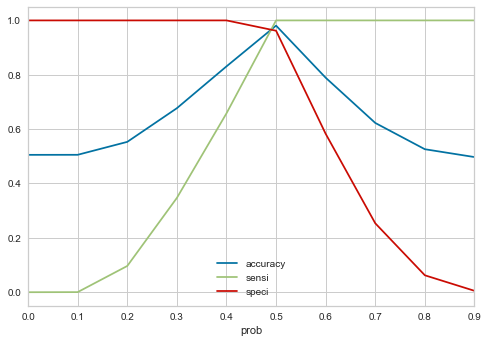

In [80]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

# Point where we are getting high accuracy,sensitivity and specificity is 0.49

In [81]:
confusion_matrix(Y_test,predictions['popular'])

array([[3901, 2023],
       [1982, 3988]], dtype=int64)

In [82]:
accuracy_score(Y_test,predictions['popular'])

0.6632756011434336

In [83]:
print(classification_report(Y_test,predictions['popular']))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      5924
           1       0.66      0.67      0.67      5970

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



In [127]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression','Random Forest','Dec_tree','GradientBoostingClassifier','XGB'],
    'Train_Accuracy': [ logreg_score, random_forest_score,Dec_tree_score,gradientboost_score,xgradientboost_score],
    'Test_Accuracy': [ logreg_score_test, random_forest_score_test,Dec_tree_score_test,gradientboost_test_score,xgradientboost_test_score]})
models.sort_values(by='Test_Accuracy', ascending=False)

,Model,Train_Accuracy,Test_Accuracy
3,GradientBoostingClassifier,67.86,66.36
1,Random Forest,68.00,65.28
4,XGB,69.90,63.24
2,Dec_tree,69.00,62.64
0,Logistic Regression,62.00,61.62


# PCA

In [84]:
from sklearn.decomposition import PCA

In [85]:
pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(X_train_ms)
x_test_pca=pca.transform(X_test_ms)
X_train_pca_df=pd.DataFrame(x_train_pca)
X_test_pca_df=pd.DataFrame(x_test_pca)

# Logistic Regression

In [86]:
# Create logistic regression object
logreg = LogisticRegression(max_iter=500,C=100,random_state=0)
# Train the model using the training sets and check score
logreg.fit(X_train_pca_df, Y_train)
#Predict Output
log_predicted= logreg.predict(X_test_pca_df)

logreg_score = round(logreg.score(X_train_pca_df, Y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test_pca_df, Y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(Y_test,log_predicted))

Logistic Regression Training Score: 
 61.17
Logistic Regression Test Score: 
 60.9
Coefficient: 
 [[ 0.21242336  0.01886094  0.50129419  0.23102757  0.83163517  0.6344714
  -0.57195433  0.63157598 -1.26809081 -0.99390781 -0.07435161  0.08443871
  -0.21453532]]
Intercept: 
 [-0.04532665]
Accuracy: 
 0.6090465781066083


In [87]:
pca.explained_variance_ratio_.sum()

0.9644780051798645

In [88]:
pca.n_components_

13

# Decision Tree

DecisionTree Score: 
 67.83
DecisionTree Test Score: 
 60.16
Accuracy: 
 0.6016478896922818
[[3610 2314]
 [2424 3546]]
              precision    recall  f1-score   support

           0       0.60      0.61      0.60      5924
           1       0.61      0.59      0.60      5970

    accuracy                           0.60     11894
   macro avg       0.60      0.60      0.60     11894
weighted avg       0.60      0.60      0.60     11894



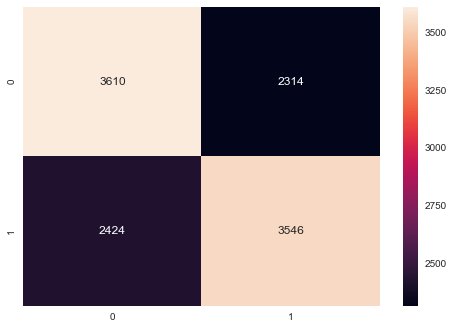

In [89]:
Dec_tree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=10,min_samples_leaf=20)
Dec_tree.fit(X_train_pca_df, Y_train)
#Predict Output
Dec_tree_predicted = Dec_tree.predict(X_test_pca_df)

Dec_tree_score = round(Dec_tree.score(X_train_pca_df, Y_train) * 100, 2)
Dec_tree_score_test = round(Dec_tree.score(X_test_pca_df, Y_test) * 100, 2)
print('DecisionTree Score: \n', Dec_tree_score)
print('DecisionTree Test Score: \n', Dec_tree_score_test)
print('Accuracy: \n', accuracy_score(Y_test, Dec_tree_predicted))
print(confusion_matrix(Y_test,Dec_tree_predicted))
print(classification_report(Y_test,Dec_tree_predicted))

sns.heatmap(confusion_matrix(Y_test,Dec_tree_predicted),annot=True,fmt="d")

# Random Forest

In [90]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=50,random_state=0)
random_forest.fit(X_train_pca_df, Y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test_pca_df)

random_forest_score = round(random_forest.score(X_train_pca_df, Y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test_pca_df, Y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(Y_test,rf_predicted))
print(confusion_matrix(Y_test,rf_predicted))
print(classification_report(Y_test,rf_predicted))



Random Forest Score: 
 67.73
Random Forest Test Score: 
 63.06
Accuracy: 
 0.630570035311922
[[3786 2138]
 [2256 3714]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      5924
           1       0.63      0.62      0.63      5970

    accuracy                           0.63     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.63      0.63     11894



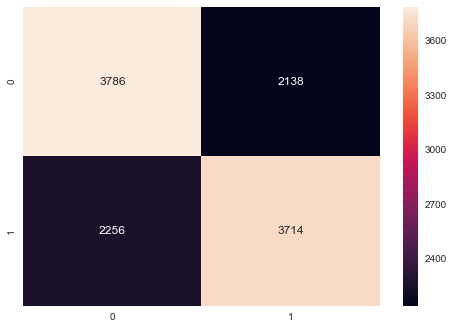

In [91]:

sns.heatmap(confusion_matrix(Y_test,rf_predicted),annot=True,fmt="d")

# Gradient Boosting

In [92]:
gb = GradientBoostingClassifier(n_estimators=100,warm_start=True,max_depth=6)
gb.fit(X_train_pca_df, Y_train)
#Predict Output
gb_predicted = gb.predict(X_test_pca_df)

gradientboost_score = round(gb.score(X_train_pca_df, Y_train) * 100, 2)
gradientboost_test_score = round(gb.score(X_test_pca_df, Y_test) * 100, 2)
print('gradientboost Score: \n', gradientboost_score)
print('gradientboost Test Score: \n', gradientboost_test_score)
print('Accuracy: \n', accuracy_score(Y_test,gb_predicted))
print(confusion_matrix(Y_test,gb_predicted))
print(classification_report(Y_test,gb_predicted))

gradientboost Score: 
 73.56
gradientboost Test Score: 
 62.94
Accuracy: 
 0.6293929712460063
[[3898 2026]
 [2382 3588]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      5924
           1       0.64      0.60      0.62      5970

    accuracy                           0.63     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.63      0.63     11894



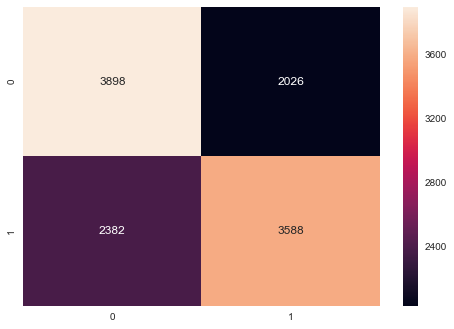

In [93]:
sns.heatmap(confusion_matrix(Y_test,gb_predicted),annot=True,fmt="d")

# XGBoost

In [94]:
from xgboost import XGBClassifier

In [95]:
xgb = XGBClassifier(n_estimators=100,warm_start=True,max_depth=5,learning_rate=0.11)
xgb.fit(X_train_pca_df, Y_train)
#Predict Output
xgb_predicted = xgb.predict(X_test_pca_df)

xgradientboost_score = round(xgb.score(X_train_pca_df, Y_train) * 100, 2)
xgradientboost_test_score = round(xgb.score(X_test_pca_df, Y_test) * 100, 2)
print('xgradientboost Score: \n', xgradientboost_score)
print('xgradientboost Test Score: \n', xgradientboost_test_score)
print('Accuracy: \n', accuracy_score(Y_test,xgb_predicted))
print(confusion_matrix(Y_test,xgb_predicted))
print(classification_report(Y_test,xgb_predicted))

xgradientboost Score: 
 69.9
xgradientboost Test Score: 
 63.24
Accuracy: 
 0.6324197074155036
[[3946 1978]
 [2394 3576]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      5924
           1       0.64      0.60      0.62      5970

    accuracy                           0.63     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.63      0.63     11894



,Model,Train_Accuracy,Test_Accuracy
4,XGB,69.90,63.24
1,Random Forest,67.73,63.06
3,GradientBoostingClassifier,73.56,62.94
0,Logistic Regression,61.17,60.90
2,Dec_tree,67.83,60.16


- The logistic regression is giving an accuracy of